In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense  
from sklearn.metrics import r2_score
from tqdm import tqdm

# Data

In [29]:
train=pd.read_excel('Data set - Tisa.xlsx',sheet_name='Training set 2011-2015')
train.columns=['temperature', 'solids', 'dissolved_oxygen', 'pH','electrical', 'NH4', 'NO2', 'NO3', 'TN', 'PO4P', 'BOD5']
test=pd.read_excel('Data set - Tisa.xlsx',sheet_name='Testing set 2016-2019 ')
test.columns=['temperature', 'solids', 'dissolved_oxygen', 'pH','electrical', 'NH4', 'NO2', 'NO3', 'TN', 'PO4P', 'BOD5']
print(train.shape,test.shape)

(626, 11) (492, 11)


# Prepare

In [95]:
def _prepare_data(data):
    X_train=data.drop(['dissolved_oxygen'],axis=1)
    y_train=data.dissolved_oxygen
    return X_train , y_train

In [99]:
def _scale_data(X_train,y_train):
    X_scaler=StandardScaler()
    X_train_scaled=X_scaler.fit_transform(X_train)
    y_scaler=StandardScaler()
    y_train_scaled=y_scaler.fit_transform(np.array(y_train).reshape(-1,1))
    print(X_train_scaled.shape, y_train_scaled.shape)
    return X_train_scaled,y_train_scaled , X_scaler , y_scaler

In [101]:
X_train,y_train=_prepare_data(train)
X_train,y_train , X_scaler , y_scaler=_scale_data(X_train,y_train)

(626, 10) (626, 1)


# Model


In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train[0].shape[0],), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train,epochs=10,batch_size=8)

KerasRegressor(model=model, epochs=100, batch_size=5, verbose=0).fit(X_train, y_train)


we have some missing values here

In [110]:
nonul_train=train.drop(list(train[train.isna().any(axis=1)].index),axis=0)
X_train,y_train=_prepare_data(nonul_train)
X_train,y_train , X_scaler , y_scaler=_scale_data(X_train,y_train)



(605, 10) (605, 1)


In [117]:
nonul_test=test.drop(list(test[test.isna().any(axis=1)].index),axis=0)
X_test,y_test=_prepare_data(nonul_test)

X_test=X_scaler.transform(X_test)
y_test=y_scaler.transform(np.array(y_test).reshape(-1,1))


let's create the model and compile it

In [172]:
def _compile_model(X_train,y_train,X_test,y_test,epochs,batch_size):
    model = Sequential()
    model.add(Dense(X_train[0].shape[0], input_shape=(X_train[0].shape[0],), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,y_test))
    history=model.history
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    return history , r2


In [ ]:
history , r2=_compile_model(X_train,y_train,X_test,y_test,80,32)

batch size itrator

In [180]:
r2_all=[]
for item in tqdm([8,16,32,64,128,256,512]):
    history , r2=_compile_model(X_train,y_train,X_test,y_test,80,item)
    r2_all.append(r2)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 1/80
76/76 [==============================] - 1s 7ms/step - loss: 0.9799 - val_loss: 0.7359
Epoch 2/80
76/76 [==============================] - 0s 5ms/step - loss: 0.9088 - val_loss: 0.6404
Epoch 3/80
76/76 [==============================] - 0s 5ms/step - loss: 0.8070 - val_loss: 0.5552
Epoch 4/80
76/76 [==============================] - 0s 5ms/step - loss: 0.7539 - val_loss: 0.5241
Epoch 5/80
76/76 [==============================] - 0s 6ms/step - loss: 0.7305 - val_loss: 0.5132
Epoch 6/80
76/76 [==============================] - 0s 5ms/step - loss: 0.7200 - val_loss: 0.5101
Epoch 7/80
76/76 [==============================] - 0s 5ms/step - loss: 0.7085 - val_loss: 0.5094
Epoch 8/80
76/76 [==============================] - 0s 5ms/step - loss: 0.7015 - val_loss: 0.5120
Epoch 9/80
76/76 [==============================] - 0s 6ms/step - loss: 0.6972 - val_loss: 0.5161
Epoch 10/80
76/76 [==============================] - 0s 6ms/step - loss: 0.6921 - val_loss: 0.5183
Epoch 11/80
76/76 [

 14%|█▍        | 1/7 [00:25<02:33, 25.61s/it]

Epoch 1/80
38/38 [==============================] - 1s 8ms/step - loss: 0.9808 - val_loss: 0.7415
Epoch 2/80
38/38 [==============================] - 0s 4ms/step - loss: 0.9398 - val_loss: 0.6931
Epoch 3/80
38/38 [==============================] - 0s 4ms/step - loss: 0.8759 - val_loss: 0.6326
Epoch 4/80
38/38 [==============================] - 0s 4ms/step - loss: 0.8170 - val_loss: 0.5860
Epoch 5/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7784 - val_loss: 0.5577
Epoch 6/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7581 - val_loss: 0.5426
Epoch 7/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7415 - val_loss: 0.5330
Epoch 8/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7320 - val_loss: 0.5275
Epoch 9/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7240 - val_loss: 0.5250
Epoch 10/80
38/38 [==============================] - 0s 4ms/step - loss: 0.7163 - val_loss: 0.5229
Epoch 11/80
38/38 [

 29%|██▊       | 2/7 [00:38<01:30, 18.08s/it]

Epoch 1/80
19/19 [==============================] - 1s 12ms/step - loss: 0.9905 - val_loss: 0.7545
Epoch 2/80
19/19 [==============================] - 0s 5ms/step - loss: 0.9711 - val_loss: 0.7318
Epoch 3/80
19/19 [==============================] - 0s 6ms/step - loss: 0.9438 - val_loss: 0.7010
Epoch 4/80
19/19 [==============================] - 0s 5ms/step - loss: 0.9091 - val_loss: 0.6619
Epoch 5/80
19/19 [==============================] - 0s 5ms/step - loss: 0.8672 - val_loss: 0.6235
Epoch 6/80
19/19 [==============================] - 0s 5ms/step - loss: 0.8280 - val_loss: 0.5908
Epoch 7/80
19/19 [==============================] - 0s 5ms/step - loss: 0.7954 - val_loss: 0.5677
Epoch 8/80
19/19 [==============================] - 0s 5ms/step - loss: 0.7736 - val_loss: 0.5496
Epoch 9/80
19/19 [==============================] - 0s 5ms/step - loss: 0.7575 - val_loss: 0.5399
Epoch 10/80
19/19 [==============================] - 0s 5ms/step - loss: 0.7466 - val_loss: 0.5300
Epoch 11/80
19/19 

 43%|████▎     | 3/7 [00:47<00:55, 13.77s/it]

Epoch 1/80
10/10 [==============================] - 1s 21ms/step - loss: 0.9821 - val_loss: 0.7479
Epoch 2/80
10/10 [==============================] - 0s 7ms/step - loss: 0.9699 - val_loss: 0.7359
Epoch 3/80
10/10 [==============================] - 0s 8ms/step - loss: 0.9566 - val_loss: 0.7218
Epoch 4/80
10/10 [==============================] - 0s 7ms/step - loss: 0.9412 - val_loss: 0.7055
Epoch 5/80
10/10 [==============================] - 0s 8ms/step - loss: 0.9231 - val_loss: 0.6877
Epoch 6/80
10/10 [==============================] - 0s 8ms/step - loss: 0.9031 - val_loss: 0.6685
Epoch 7/80
10/10 [==============================] - 0s 8ms/step - loss: 0.8835 - val_loss: 0.6474
Epoch 8/80
10/10 [==============================] - 0s 8ms/step - loss: 0.8618 - val_loss: 0.6267
Epoch 9/80
10/10 [==============================] - 0s 7ms/step - loss: 0.8406 - val_loss: 0.6080
Epoch 10/80
10/10 [==============================] - 0s 7ms/step - loss: 0.8212 - val_loss: 0.5910
Epoch 11/80
10/10 

 57%|█████▋    | 4/7 [00:58<00:38, 12.71s/it]

Epoch 1/80
5/5 [==============================] - 1s 43ms/step - loss: 0.9982 - val_loss: 0.7683
Epoch 2/80
5/5 [==============================] - 0s 11ms/step - loss: 0.9938 - val_loss: 0.7645
Epoch 3/80
5/5 [==============================] - 0s 11ms/step - loss: 0.9896 - val_loss: 0.7601
Epoch 4/80
5/5 [==============================] - 0s 12ms/step - loss: 0.9847 - val_loss: 0.7551
Epoch 5/80
5/5 [==============================] - 0s 14ms/step - loss: 0.9794 - val_loss: 0.7492
Epoch 6/80
5/5 [==============================] - 0s 12ms/step - loss: 0.9729 - val_loss: 0.7424
Epoch 7/80
5/5 [==============================] - 0s 12ms/step - loss: 0.9653 - val_loss: 0.7346
Epoch 8/80
5/5 [==============================] - 0s 12ms/step - loss: 0.9561 - val_loss: 0.7258
Epoch 9/80
5/5 [==============================] - 0s 10ms/step - loss: 0.9464 - val_loss: 0.7157
Epoch 10/80
5/5 [==============================] - 0s 12ms/step - loss: 0.9351 - val_loss: 0.7046
Epoch 11/80
5/5 [============

 71%|███████▏  | 5/7 [01:03<00:20, 10.24s/it]

Epoch 1/80
3/3 [==============================] - 1s 102ms/step - loss: 0.9990 - val_loss: 0.7723
Epoch 2/80
3/3 [==============================] - 0s 25ms/step - loss: 0.9963 - val_loss: 0.7700
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.9937 - val_loss: 0.7679
Epoch 4/80
3/3 [==============================] - 0s 33ms/step - loss: 0.9912 - val_loss: 0.7656
Epoch 5/80
3/3 [==============================] - 0s 28ms/step - loss: 0.9888 - val_loss: 0.7633
Epoch 6/80
3/3 [==============================] - 0s 26ms/step - loss: 0.9861 - val_loss: 0.7609
Epoch 7/80
3/3 [==============================] - 0s 26ms/step - loss: 0.9835 - val_loss: 0.7583
Epoch 8/80
3/3 [==============================] - 0s 29ms/step - loss: 0.9807 - val_loss: 0.7555
Epoch 9/80
3/3 [==============================] - 0s 35ms/step - loss: 0.9775 - val_loss: 0.7524
Epoch 10/80
3/3 [==============================] - 0s 32ms/step - loss: 0.9739 - val_loss: 0.7489
Epoch 11/80
3/3 [===========

 86%|████████▌ | 6/7 [01:10<00:09,  9.03s/it]

Epoch 1/80
2/2 [==============================] - 1s 197ms/step - loss: 0.9992 - val_loss: 0.7777
Epoch 2/80
2/2 [==============================] - 0s 55ms/step - loss: 0.9973 - val_loss: 0.7762
Epoch 3/80
2/2 [==============================] - 0s 57ms/step - loss: 0.9955 - val_loss: 0.7747
Epoch 4/80
2/2 [==============================] - 0s 53ms/step - loss: 0.9938 - val_loss: 0.7733
Epoch 5/80
2/2 [==============================] - 0s 53ms/step - loss: 0.9921 - val_loss: 0.7719
Epoch 6/80
2/2 [==============================] - 0s 66ms/step - loss: 0.9904 - val_loss: 0.7704
Epoch 7/80
2/2 [==============================] - 0s 60ms/step - loss: 0.9886 - val_loss: 0.7689
Epoch 8/80
2/2 [==============================] - 0s 58ms/step - loss: 0.9868 - val_loss: 0.7674
Epoch 9/80
2/2 [==============================] - 0s 48ms/step - loss: 0.9849 - val_loss: 0.7658
Epoch 10/80
2/2 [==============================] - 0s 58ms/step - loss: 0.9829 - val_loss: 0.7641
Epoch 11/80
2/2 [===========

100%|██████████| 7/7 [01:17<00:00, 11.02s/it]


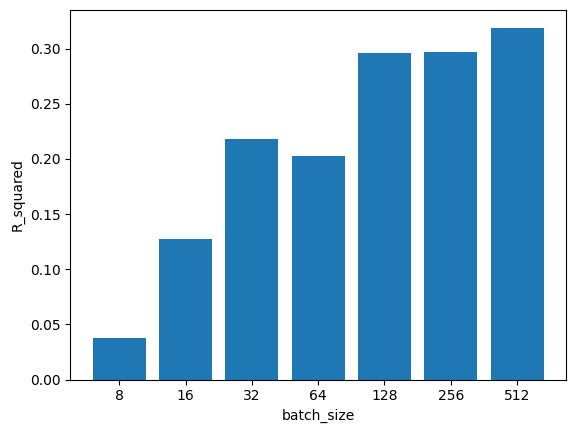

In [188]:
plt.bar(range(7),r2_all)
plt.xticks(range(7),[8,16,32,64,128,256,512])
plt.xlabel('batch_size')
plt.ylabel('R_squared')
plt.show()

epochs

In [191]:
# r2_all=[]
for item in tqdm(range(150,200,10)):
    history , r2=_compile_model(X_train,y_train,X_test,y_test,item,8)
    r2_all.append(r2)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/150
76/76 [==============================] - 2s 10ms/step - loss: 0.9837 - val_loss: 0.7372
Epoch 2/150
76/76 [==============================] - 0s 4ms/step - loss: 0.9113 - val_loss: 0.6397
Epoch 3/150
76/76 [==============================] - 0s 3ms/step - loss: 0.8040 - val_loss: 0.5580
Epoch 4/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7648 - val_loss: 0.5265
Epoch 5/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7454 - val_loss: 0.5178
Epoch 6/150
76/76 [==============================] - 0s 4ms/step - loss: 0.7327 - val_loss: 0.5125
Epoch 7/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7259 - val_loss: 0.5091
Epoch 8/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7218 - val_loss: 0.5103
Epoch 9/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7142 - val_loss: 0.5089
Epoch 10/150
76/76 [==============================] - 0s 3ms/step - loss: 0.7095 - val_loss: 0.5105
Epoch 11

 20%|██        | 1/5 [00:39<02:39, 39.89s/it]

Epoch 1/160
76/76 [==============================] - 1s 5ms/step - loss: 0.9687 - val_loss: 0.7145
Epoch 2/160
76/76 [==============================] - 0s 3ms/step - loss: 0.8932 - val_loss: 0.6228
Epoch 3/160
76/76 [==============================] - 0s 3ms/step - loss: 0.8119 - val_loss: 0.5546
Epoch 4/160
76/76 [==============================] - 0s 3ms/step - loss: 0.7557 - val_loss: 0.5183
Epoch 5/160
76/76 [==============================] - 0s 3ms/step - loss: 0.7308 - val_loss: 0.5040
Epoch 6/160
76/76 [==============================] - 0s 4ms/step - loss: 0.7170 - val_loss: 0.5032
Epoch 7/160
76/76 [==============================] - 0s 3ms/step - loss: 0.7091 - val_loss: 0.5033
Epoch 8/160
76/76 [==============================] - 0s 4ms/step - loss: 0.7029 - val_loss: 0.5075
Epoch 9/160
76/76 [==============================] - 0s 3ms/step - loss: 0.6974 - val_loss: 0.5114
Epoch 10/160
76/76 [==============================] - 0s 3ms/step - loss: 0.6938 - val_loss: 0.5145
Epoch 11/

 40%|████      | 2/5 [01:27<02:13, 44.41s/it]

Epoch 1/170
76/76 [==============================] - 1s 6ms/step - loss: 0.9785 - val_loss: 0.7254
Epoch 2/170
76/76 [==============================] - 0s 4ms/step - loss: 0.8835 - val_loss: 0.6215
Epoch 3/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7971 - val_loss: 0.5613
Epoch 4/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7575 - val_loss: 0.5341
Epoch 5/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7379 - val_loss: 0.5211
Epoch 6/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7267 - val_loss: 0.5161
Epoch 7/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7206 - val_loss: 0.5103
Epoch 8/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7129 - val_loss: 0.5137
Epoch 9/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7081 - val_loss: 0.5145
Epoch 10/170
76/76 [==============================] - 0s 4ms/step - loss: 0.7015 - val_loss: 0.5145
Epoch 11/

 60%|██████    | 3/5 [02:26<01:42, 51.07s/it]

Epoch 1/180
76/76 [==============================] - 1s 6ms/step - loss: 0.9952 - val_loss: 0.7502
Epoch 2/180
76/76 [==============================] - 0s 4ms/step - loss: 0.9221 - val_loss: 0.6498
Epoch 3/180
76/76 [==============================] - 0s 4ms/step - loss: 0.8188 - val_loss: 0.5614
Epoch 4/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7630 - val_loss: 0.5248
Epoch 5/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7413 - val_loss: 0.5118
Epoch 6/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7256 - val_loss: 0.5067
Epoch 7/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7182 - val_loss: 0.5046
Epoch 8/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7073 - val_loss: 0.5044
Epoch 9/180
76/76 [==============================] - 0s 4ms/step - loss: 0.7012 - val_loss: 0.5060
Epoch 10/180
76/76 [==============================] - 0s 4ms/step - loss: 0.6940 - val_loss: 0.5049
Epoch 11/

 80%|████████  | 4/5 [03:29<00:55, 55.96s/it]

Epoch 1/190
76/76 [==============================] - 1s 6ms/step - loss: 0.9806 - val_loss: 0.7254
Epoch 2/190
76/76 [==============================] - 0s 4ms/step - loss: 0.8891 - val_loss: 0.6159
Epoch 3/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7922 - val_loss: 0.5470
Epoch 4/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7517 - val_loss: 0.5243
Epoch 5/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7351 - val_loss: 0.5167
Epoch 6/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7220 - val_loss: 0.5139
Epoch 7/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7162 - val_loss: 0.5130
Epoch 8/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7099 - val_loss: 0.5154
Epoch 9/190
76/76 [==============================] - 0s 4ms/step - loss: 0.7039 - val_loss: 0.5161
Epoch 10/190
76/76 [==============================] - 0s 4ms/step - loss: 0.6994 - val_loss: 0.5207
Epoch 11/

100%|██████████| 5/5 [04:37<00:00, 55.44s/it]


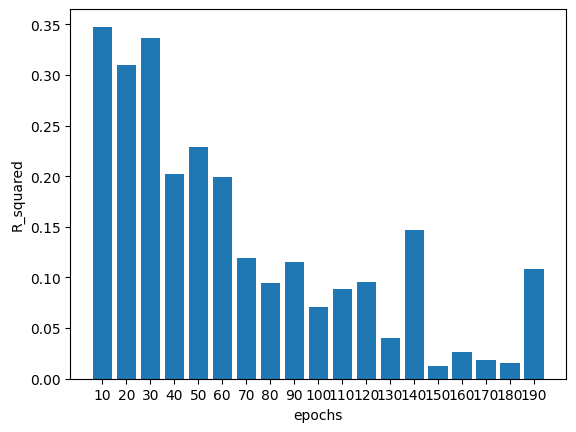

In [192]:
plt.bar(range(len(r2_all)),r2_all)
plt.xticks(range(len(r2_all)),range(10,200,10))
plt.xlabel('epochs')
plt.ylabel('R_squared')
plt.show()

# The best we have

In [210]:
x=X_test[:100,:]
y=y_test[:100,:]

In [211]:
history , r2=_compile_model(X_train,y_train,x,y,150,8)

Epoch 1/150
76/76 [==============================] - 2s 10ms/step - loss: 0.9840 - val_loss: 0.2815
Epoch 2/150
76/76 [==============================] - 1s 7ms/step - loss: 0.9100 - val_loss: 0.2042
Epoch 3/150
76/76 [==============================] - 1s 7ms/step - loss: 0.8204 - val_loss: 0.1540
Epoch 4/150
76/76 [==============================] - 1s 7ms/step - loss: 0.7760 - val_loss: 0.1297
Epoch 5/150
76/76 [==============================] - 1s 7ms/step - loss: 0.7493 - val_loss: 0.1274
Epoch 6/150
76/76 [==============================] - 0s 6ms/step - loss: 0.7382 - val_loss: 0.1291
Epoch 7/150
76/76 [==============================] - 0s 6ms/step - loss: 0.7307 - val_loss: 0.1315
Epoch 8/150
76/76 [==============================] - 1s 7ms/step - loss: 0.7220 - val_loss: 0.1345
Epoch 9/150
76/76 [==============================] - 1s 7ms/step - loss: 0.7178 - val_loss: 0.1373
Epoch 10/150
76/76 [==============================] - 1s 7ms/step - loss: 0.7148 - val_loss: 0.1477
Epoch 11

In [212]:
r2

-1.084627874795956

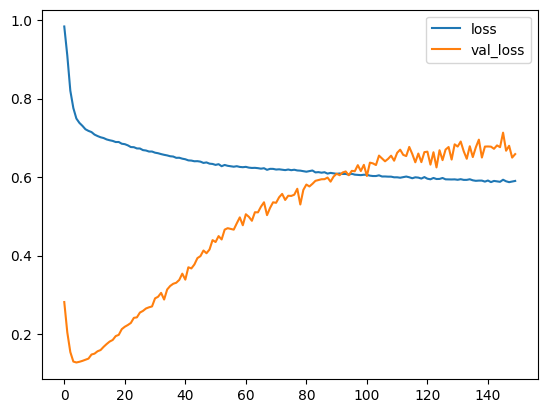

In [213]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()